In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
sp = pd.read_csv('downloads/SAP.DE.csv',index_col=0, parse_dates=True)

In [45]:
print(type(sp))

<class 'pandas.core.frame.DataFrame'>


In [46]:
print(sp.head())


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2015-01-02  58.240002  59.000000  57.480000  58.259998  51.388027  1994640
2015-01-05  57.740002  58.180000  56.330002  56.340000  49.694496  3302045
2015-01-06  55.650002  55.880001  54.919998  55.070000  48.574303  4210996
2015-01-07  55.279999  55.540001  54.630001  54.869999  48.397888  3313252
2015-01-08  55.500000  56.099998  53.630001  56.070000  49.456348  5707800


In [47]:
print(sp.shape)


(1521, 6)


In [48]:
# print summary statistics of SAP
print(sp.describe())


              Open         High          Low        Close    Adj Close  \
count  1521.000000  1521.000000  1521.000000  1521.000000  1521.000000   
mean     91.930500    92.740901    91.077107    91.950973    85.703879   
std      20.233883    20.428815    19.993232    20.212719    21.077641   
min      54.820000    55.209999    53.630001    54.529999    48.097996   
25%      73.779999    74.349998    73.349998    73.940002    66.433472   
50%      91.669998    92.339996    90.800003    91.720001    84.892593   
75%     104.080002   104.620003   103.080002   103.839996    98.789421   
max     142.800003   143.320007   141.080002   142.259995   139.157257   

             Volume  
count  1.521000e+03  
mean   2.684794e+06  
std    1.586684e+06  
min    0.000000e+00  
25%    1.816078e+06  
50%    2.310287e+06  
75%    3.050317e+06  
max    2.220034e+07  


In [49]:
# select all the price information of SAP in 2016.
sp_2015 = sp.loc['2015-01-01':'2015-12-31']  ###################################################### SELECTION BY LABEL
 

In [50]:
# print the price of SAP on '2015-03-16'
print(sp_2015.loc['2015-03-16'])

Open         6.490000e+01
High         6.581000e+01
Low          6.487000e+01
Close        6.549000e+01
Adj Close    5.776522e+01
Volume       3.136083e+06
Name: 2015-03-16 00:00:00, dtype: float64


In [51]:
# print the opening price of the first row# ################################################# SELECTION BY POSITION
print(sp.iloc[0, 0]) 

58.240002


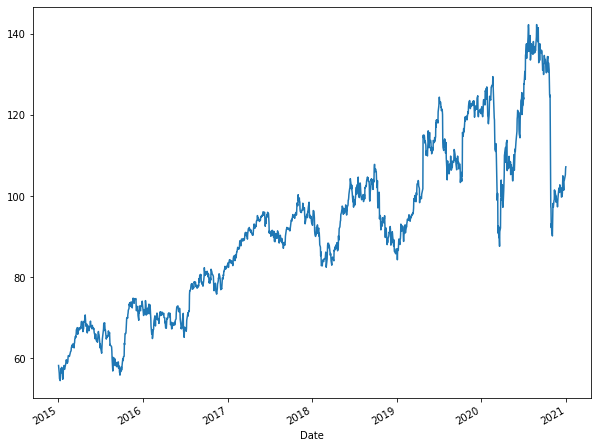

In [52]:
plt.figure(figsize=(10, 8))
sp['Close'].plot()
plt.show()

In [53]:
#Create a new column PriceDiff in the DataFrame sp ############################################# PRICE DIFFERENCE
sp['PriceDiff'] = sp['Close'].shift(-1) - sp['Close']

In [54]:
#Run this code to display the price difference of SAP on 2015-01-05
print(sp['PriceDiff'].loc['2015-03-16'])

-0.36999500000000296


In [55]:
#Create a new column Return in the DataFrame sp ################################################ DAILY RETURN
sp['Return'] = sp['PriceDiff'] /sp['Close']        

In [56]:
#Your turn to create a new column Return in the DataFrame MS
sp['Return'] = None

In [57]:
#Run this code to print the return on 2015-01-05
print(sp['Return'].loc['2015-03-16'])

None


In [58]:
#Create a new column Direction.  ################################################################ DIRECTION
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - sp

sp['Direction'] = [1 if sp['PriceDiff'].loc[ei] > 0 else 0 for ei in sp.index ]

In [59]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', sp['PriceDiff'].loc['2015-01-05'], sp['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -1.2700000000000031. direction is 0


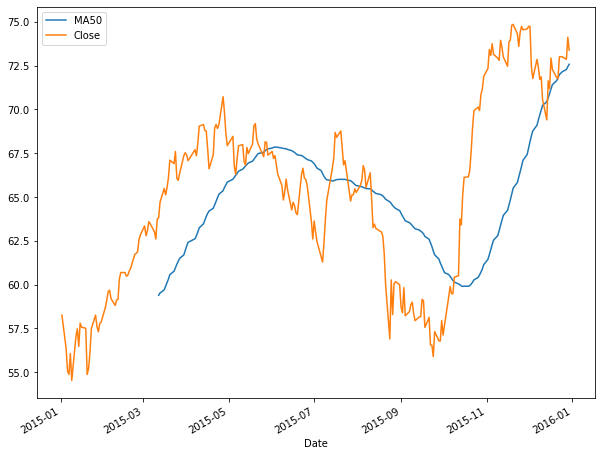

In [60]:
sp['ma50'] = sp['Close'].rolling(50).mean()   ######################################## MOVING AVERAGE

#plot the moving average
plt.figure(figsize=(10, 8))
sp['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
sp['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

In [62]:
 ###################################TRADING STRATEGY ##########################################################
    
#import sp's stock data, add two columns - MA10 and MA50     ############################### MUNGING STOCK DATA
#use dropna to remove any "Not a Number" data
sp['MA10'] = sp['Close'].rolling(10).mean()
sp['MA50'] = sp['Close'].rolling(50).mean()
sp = sp.dropna()
sp.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-12,63.619999,64.940002,63.549999,63.799999,56.274570,2880081,63.228000,59.3916
2015-03-13,64.150002,64.959999,63.770000,64.699997,57.068401,2952479,63.413999,59.5204
2015-03-16,64.900002,65.809998,64.870003,65.489998,57.765224,3136083,63.627999,59.7034
2015-03-17,65.500000,66.080002,64.760002,65.120003,57.438869,3245175,63.861000,59.9044
2015-03-18,65.389999,66.129997,65.250000,65.529999,57.800510,3334219,64.107000,60.1176


In [63]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

sp['Shares'] = [1 if sp.loc[ei, 'MA10']>sp.loc[ei, 'MA50'] else 0 for ei in sp.index]

######## Add "Shares" column to make decisions base on the strategy #############

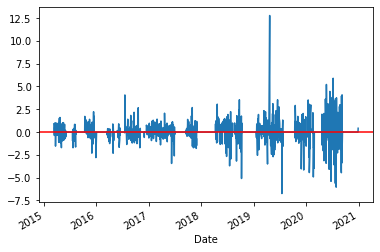

In [64]:
#Add a new column "Profit" using List Comprehension, for any rows in sp, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a grsph to show the Profit/Loss

sp['Close1'] = sp['Close'].shift(-1)
sp['Profit'] = [sp.loc[ei, 'Close1'] - sp.loc[ei, 'Close'] if sp.loc[ei, 'Shares']==1 else 0 for ei in sp.index]
sp['Profit'].plot()
plt.axhline(y=0, color='red')

In [65]:
#Use .cumsum() to calculate the accumulated wealth over the period

sp['wealth'] = sp['Profit'].cumsum()
sp.tail()

######### Use .cumsum() to display our model's performance if we follow the strategy #########

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2020-12-22,102.099998,103.959999,101.900002,103.620003,101.360016,2628214,102.076001,104.0640,0,103.760002,0.000000,56.289986
2020-12-23,104.080002,104.199997,103.220001,103.760002,101.496964,1628435,102.244001,103.4528,0,105.260002,0.000000,56.289986
2020-12-28,105.099998,106.120003,104.660004,105.260002,102.964241,2057725,102.652001,102.9468,0,106.800003,0.000000,56.289986
2020-12-29,107.000000,107.940002,106.660004,106.800003,104.470657,2479039,103.357001,102.4260,1,107.220001,0.419998,56.709984
2020-12-30,106.940002,107.680000,106.580002,107.220001,104.881500,1526766,104.086001,101.9504,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is nan')

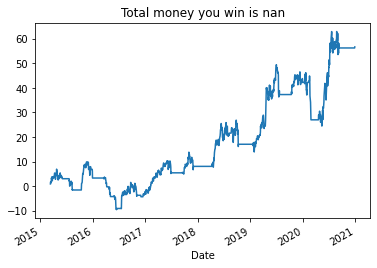

In [66]:
#plot the wealth to show the growth of profit over the period

sp['wealth'].plot()
plt.title('Total money you win is {}'.format(sp.loc[sp.index[-1], 'wealth']))

In [69]:
# let play around with ms data by calculating the log daily return
sp['LogReturn'] = np.log(sp['Close']).shift(-1) - np.log(sp['Close'])

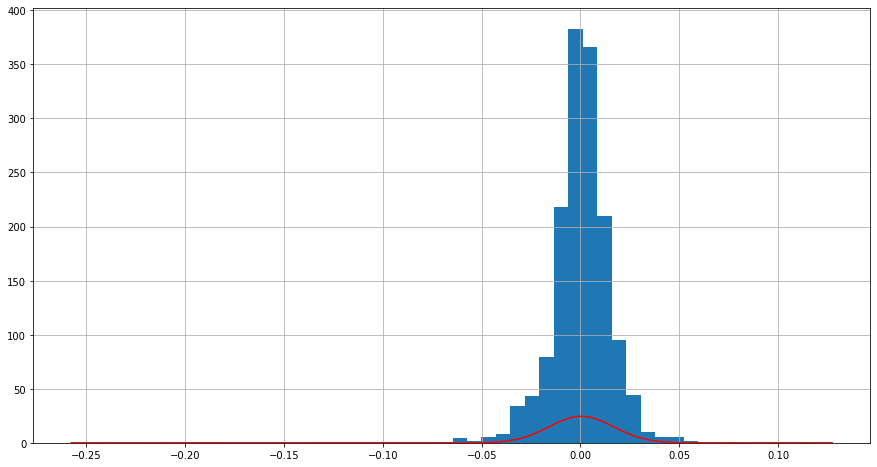

In [70]:
# Plot a histogram to show the distribution of log return of SAP's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = sp['LogReturn'].mean()
sigma = sp['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(sp['LogReturn'].min()-0.01, sp['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

sp['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [71]:
# probability that the stock price of SAP will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.0009757508795484734


In [72]:
# Now is your turn, calculate the probability that the stock price of SAP will drop over 10% in a day
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  3.4065469198927835e-10


In [73]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.0215275207755681


In [74]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.11614341454921545


In [75]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.02636297899183873


In [ ]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

In [ ]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

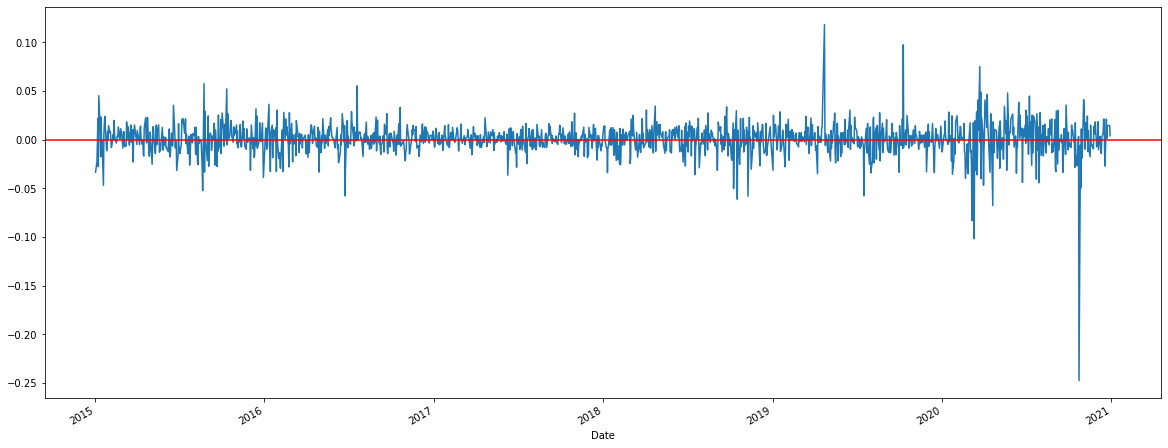

In [76]:

# we will use log return for average stock return of SAP

sp['logReturn'] = np.log(sp['Close'].shift(-1)) - np.log(sp['Close'])

# Log return goes up and down during the period
sp['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

In [78]:
sample_mean = sp['logReturn'].mean()
sample_std = sp['logReturn'].std(ddof=1)
n = sp['logReturn'].shspe[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

0.9618320110186797


In [79]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


In [80]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))


At significant level of 0.05, shall we reject: False


In [81]:
sample_mean = sp['logReturn'].mean()
sample_std = sp['logReturn'].std(ddof=1)
n = sp['logReturn'].shspe[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

0.9618320110186797


In [82]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [84]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


In [89]:
# step 3 (p-value)                   ##########Upper tail test
################################################# If Ha: mu not equal 0, it is two tail test and  p-value=2(1-norm.cdf(np.abs(z), 0, 1))

p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.16806699768190958


In [90]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
